# Exercise 1: Linear Regression

In [22]:
import os

# vector computation in python
import numpy as np

# plotting library in python
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

 
# embed plots in jupyter notebook
%matplotlib inline

In [23]:
def warmUpExercise():
    """Example function to compute the identity matrix."""
    A = []
    A = np.eye(5)
    return A

In [24]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Get and Visualize the Data

In [25]:
data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size

In [26]:
print(m)

97


In [27]:
def plotData(x, y):
    """Plot data points."""
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

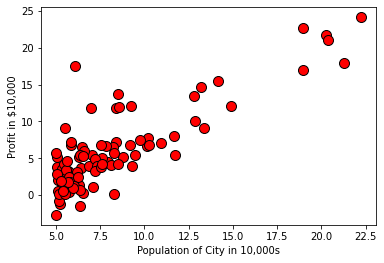

In [28]:
plotData(X, y)

In [29]:
pyplot.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [30]:
X = np.stack([np.ones(m), X], axis=1)

In [63]:
def h(theta, X):
    return np.dot(X, theta)

# function to compute the cost function
def computeCost(X, y, theta):
    """Compute cost for linear regression."""
    m = y.size
    return float((1/(2*m) * np.dot((h(theta, X) - y), (h(theta, X) - y))))

In [64]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.0\n')

# further testing
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24\n')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.0

With theta = [0, 0] 
Cost computed = 54.24
Expected cost value (approximately) 54.24



In [98]:
# Gradient Descent (optimization)
def gradientDescent(X, y, theta, alpha, num_iters):
    """Performs gradient descent to learn theta, and updates theta by taking the specified
    number of iterations."""
    m = y.shape[0] # number of training examples
    
    theta = theta.copy()
    
    J_history = [] # save the cost of every iteration
    
    for i in range(num_iters):
        theta = theta - (alpha/m) * (np.dot(X, theta) - y).dot(X)
        
        J_history.append(computeCost(X, y, theta))
    
    
    return theta, J_history

In [99]:
theta = np.zeros(2)

iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


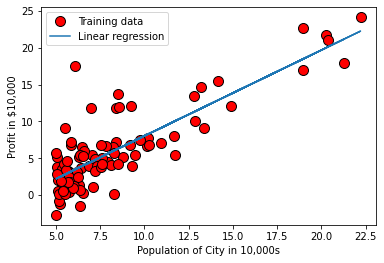

In [100]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression'])